In [1]:
# preliminaries
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import pandas as pd
import os
import lmfit
backupdir = os.getcwd()

**Question 1**

In [2]:
a0b0 = pd.read_csv('A0B0.csv', sep=',', names=['Time', 'NADPH'])
a05b24 = pd.read_csv('A0.5B24.csv', sep=',', names=['Time', 'NADPH'])
a1b24 = pd.read_csv('A1B24.csv', sep=',', names=['Time', 'NADPH'])
a2b24 = pd.read_csv('A2B24.csv', sep=',', names=['Time', 'NADPH'])
a4b24 = pd.read_csv('A4B24.csv', sep=',', names=['Time', 'NADPH'])
a8b24 = pd.read_csv('A8B24.csv', sep=',', names=['Time', 'NADPH'])
a8b15 = pd.read_csv('A8B1.5.csv', sep=',', names=['Time', 'NADPH'])
a8b3 = pd.read_csv('A8B3.csv', sep=',', names=['Time', 'NADPH'])
a8b6 = pd.read_csv('A8B6.csv', sep=',', names=['Time', 'NADPH'])
a8b12 = pd.read_csv('A8B12.csv', sep=',', names=['Time', 'NADPH'])

Text(0.5, 1.0, 'Increase of NADPH over time with constant B=24mM and varying A conc')

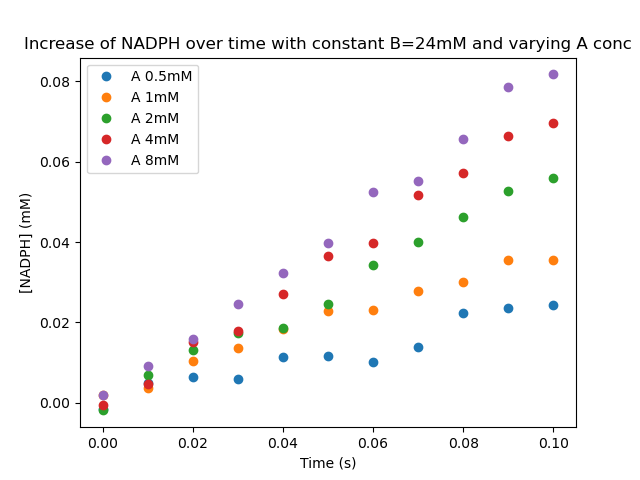

In [3]:
#Plots of varying a conc with constant b conc
fig, ax = plt.subplots()
ax.plot(a05b24.Time,a05b24.NADPH,'o', label='A 0.5mM')
ax.plot(a1b24.Time,a1b24.NADPH,'o', label='A 1mM')
ax.plot(a2b24.Time,a2b24.NADPH,'o', label='A 2mM')
ax.plot(a4b24.Time,a4b24.NADPH,'o', label='A 4mM')
ax.plot(a8b24.Time,a8b24.NADPH,'o', label='A 8mM')
ax.set_ylabel('[NADPH] (mM)')
ax.set_xlabel('Time (s)')
ax.legend(loc='best')
ax.set_title('Increase of NADPH over time with constant B=24mM and varying A conc')

Text(0.5, 1.0, 'Increase of NADPH over time with constant A=8mM and varying B conc')

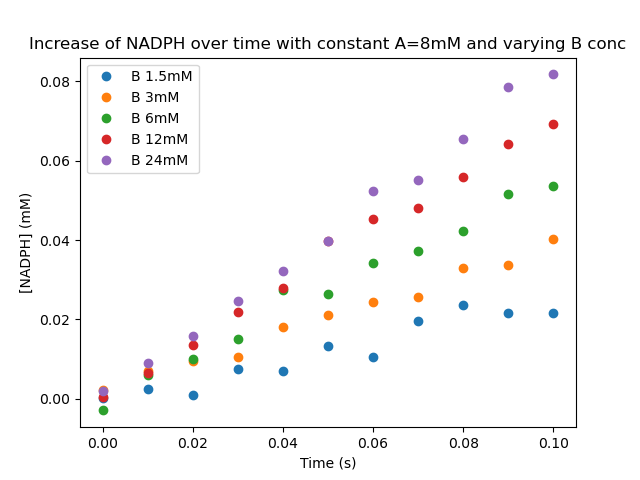

In [4]:
#Plots of varying b conc with constant a conc
fig, ax = plt.subplots()
ax.plot(a8b15.Time,a8b15.NADPH,'o', label='B 1.5mM')
ax.plot(a8b3.Time,a8b3.NADPH,'o', label='B 3mM')
ax.plot(a8b6.Time,a8b6.NADPH,'o', label='B 6mM')
ax.plot(a8b12.Time,a8b12.NADPH,'o', label='B 12mM')
ax.plot(a8b24.Time,a8b24.NADPH,'o', label='B 24mM')
ax.set_ylabel('[NADPH] (mM)')
ax.set_xlabel('Time (s)')
ax.legend(loc='best')
ax.set_title('Increase of NADPH over time with constant A=8mM and varying B conc')

**Question 2**

In [5]:
rega0b0 = sp.stats.linregress(a0b0)
rega05b24 = sp.stats.linregress(a05b24)
rega1b24 = sp.stats.linregress(a1b24)
rega2b24 = sp.stats.linregress(a2b24)
rega4b24 = sp.stats.linregress(a4b24)
rega8b24 = sp.stats.linregress(a8b24)
rega8b15 = sp.stats.linregress(a8b15)
rega8b3 = sp.stats.linregress(a8b3)
rega8b6 = sp.stats.linregress(a8b6)
rega8b12 = sp.stats.linregress(a8b12)

In [6]:
regressions = [rega0b0, rega05b24, rega1b24, rega2b24, rega4b24, rega8b24, rega8b15, rega8b3, rega8b6, rega8b12]
rates = []
for reg in regressions:
    print(reg.slope)
    rates.append(reg.slope)
rates = np.array(rates)


0.004954646341627726
0.24118661159479945
0.3526304449083254
0.5746500696105541
0.7322856639928835
0.8250788434733143
0.25422083243133853
0.3679535702854621
0.556408829374724
0.7012039804663761


In [7]:
rates

array([0.00495465, 0.24118661, 0.35263044, 0.57465007, 0.73228566,
       0.82507884, 0.25422083, 0.36795357, 0.55640883, 0.70120398])

**Question 3**

In [8]:
array = pd.DataFrame({'a':[0,0.5,1,2,4,8,8,8,8,8] , 'b':[0,24,24,24,24,24,1.5,3,6,12], 'rate': rates})

In [9]:
array

a     b      rate
0  0.0   0.0  0.004955
1  0.5  24.0  0.241187
2  1.0  24.0  0.352630
3  2.0  24.0  0.574650
4  4.0  24.0  0.732286
5  8.0  24.0  0.825079
6  8.0   1.5  0.254221
7  8.0   3.0  0.367954
8  8.0   6.0  0.556409
9  8.0  12.0  0.701204

**Question 4**

In [10]:
rates

array([0.00495465, 0.24118661, 0.35263044, 0.57465007, 0.73228566,
       0.82507884, 0.25422083, 0.36795357, 0.55640883, 0.70120398])

In [11]:
array.rate

0    0.004955
1    0.241187
2    0.352630
3    0.574650
4    0.732286
5    0.825079
6    0.254221
7    0.367954
8    0.556409
9    0.701204
Name: rate, dtype: float64

In [12]:
# def eqn 1
def v(Vf, a, b, Ka, Kb):
    return (Vf * a * b)/((Ka + a)*(Kb + b))

In [13]:
#fit
from lmfit import Model
mymod = Model(v)
mypar = mymod.make_params(Ka=1, Kb=1)
myfit = mymod.fit(rates, mypar, Vf=array.rate, a=0.5, b=24)
myfit

In [14]:
avals=array[0:6]
bvals=array[6:]
#bvals.rate=[0.254221, 0.367954, 0.556409, 0.701204, 0.825079]
print(avals)
bvals

     a     b      rate
0  0.0   0.0  0.004955
1  0.5  24.0  0.241187
2  1.0  24.0  0.352630
3  2.0  24.0  0.574650
4  4.0  24.0  0.732286
5  8.0  24.0  0.825079


a     b      rate
6  8.0   1.5  0.254221
7  8.0   3.0  0.367954
8  8.0   6.0  0.556409
9  8.0  12.0  0.701204

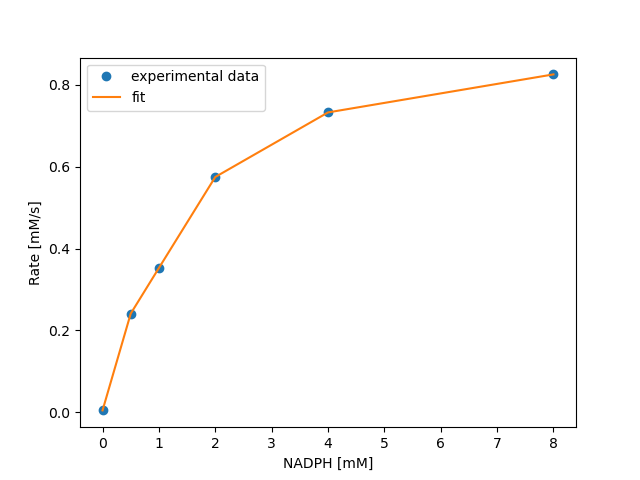

In [15]:
#plot rate vs a
fig, ax = plt.subplots()
ax.plot(avals.a,avals.rate,'o',label='experimental data') # experimental data
ax.plot(avals.a, myfit.eval(v=rates)[:6], label='fit') # fitted model
ax.set_xlabel('NADPH [mM]')
ax.set_ylabel('Rate [mM/s]')
ax.legend(loc='best')

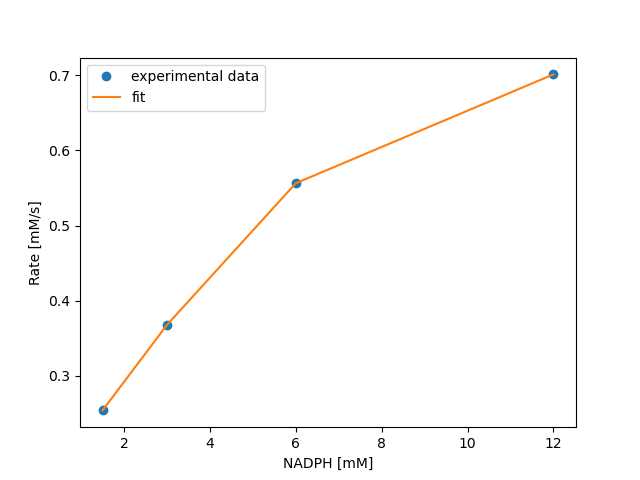

In [16]:
#plot
fig, ax = plt.subplots()
ax.plot(bvals.b,bvals.rate,'o',label='experimental data') # experimental data
ax.plot(bvals.b, myfit.eval(v=rates)[6:], label='fit') # fitted model
ax.set_xlabel('NADPH [mM]')
ax.set_ylabel('Rate [mM/s]')
ax.legend(loc='best')